# Laboratorio 1
* Statistical Learning 2
* Silvio Urizar
* 23008607

## Descripción

Es necesario analizar 2 sets de imágenes diferentes y poder clasificarlas correctamente mediante algoritmos de redes neuronales.

## Problema 1

Descargar y explorar dos sets de imágenes mediante tensorflow

### Dataset 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [2]:
## Se carga el primer dataset

builder1 = tfds.builder('malaria')
(MalariaTrain,MalariaTest), info1 = tfds.load(name ='malaria', with_info = True, split = ['train[:20%]','train[50%:55%]'])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteTSVXFL/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
info1

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmp7n2jv70gtfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

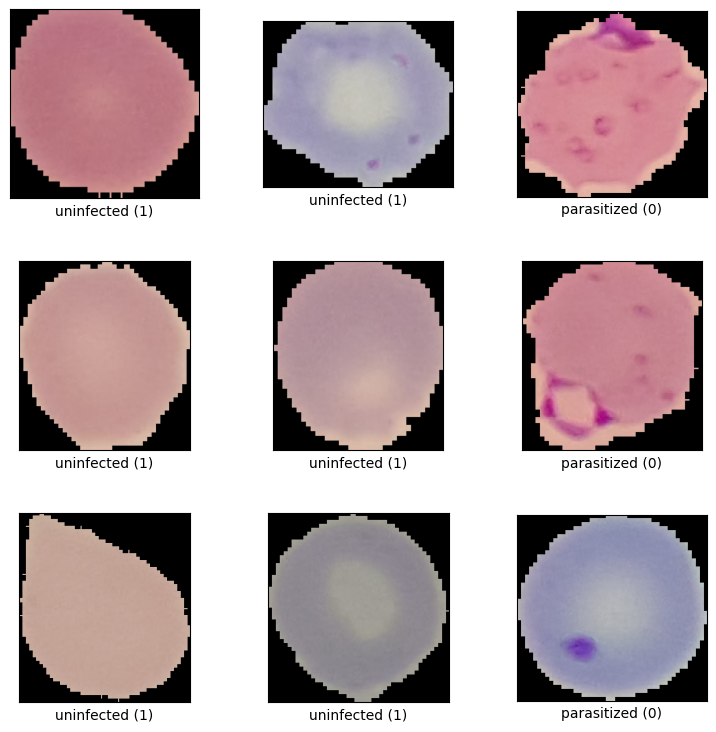

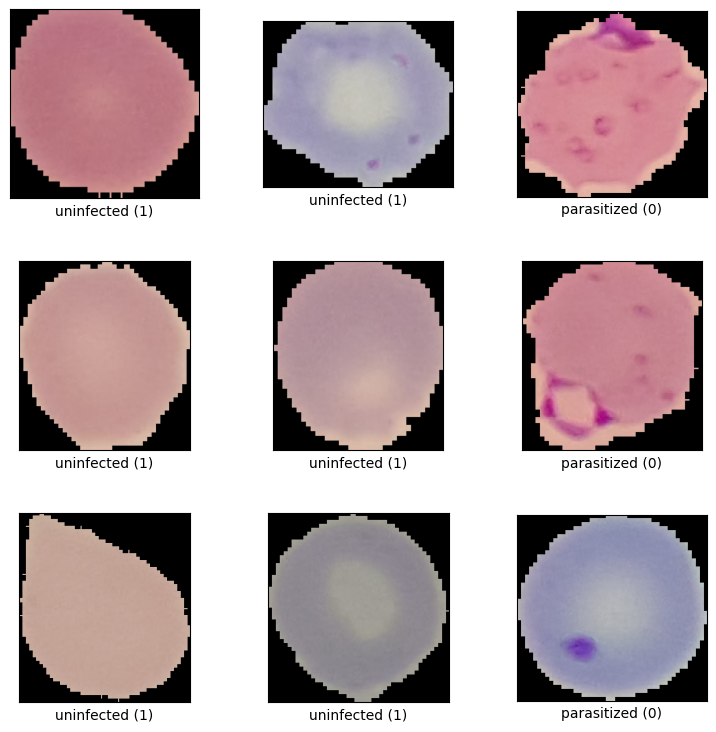

In [4]:
## Se ven ejemplos del set de entrenamiento

tfds.show_examples(MalariaTrain,info1)

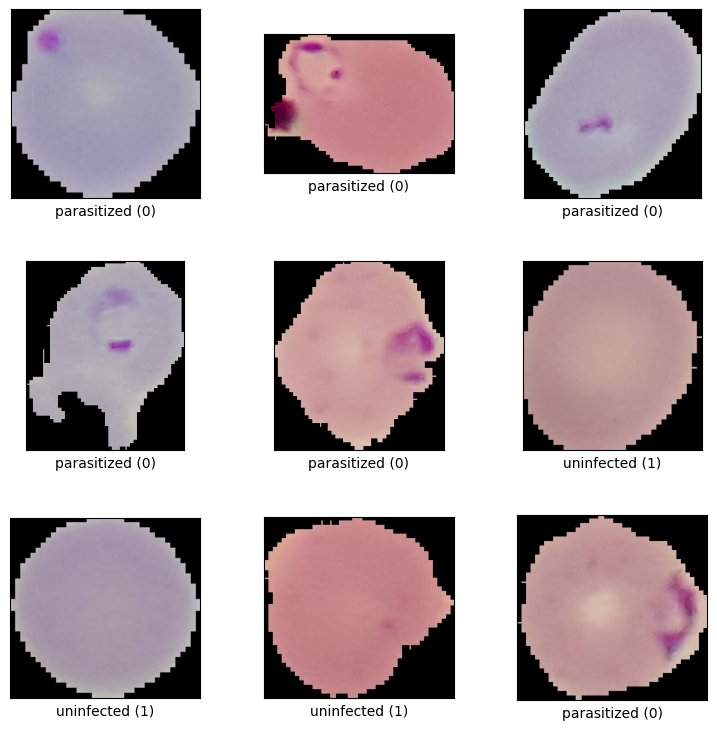

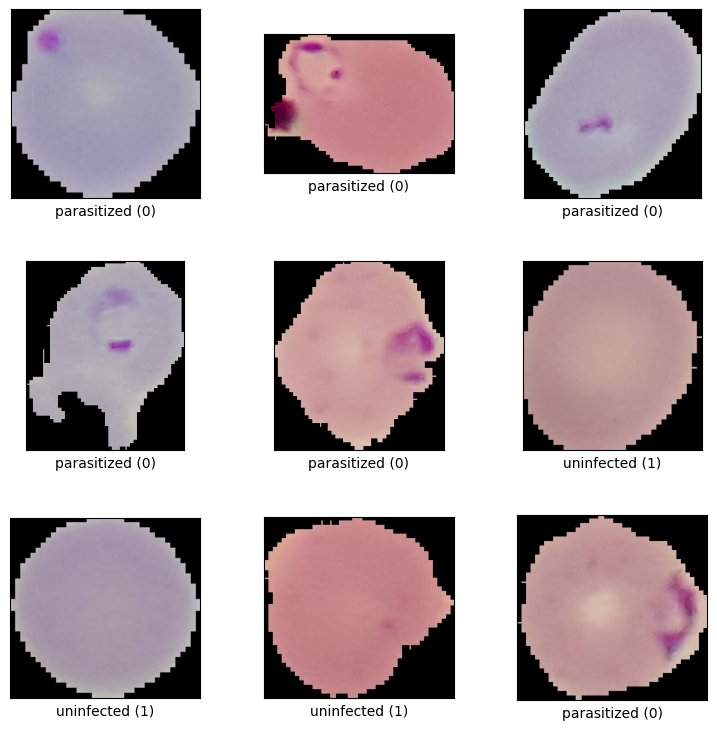

In [5]:
## Se ven ejemplos del set de pruebas
tfds.show_examples(MalariaTest,info1)

In [6]:
### Obteniendo imágenes y labels

ImTrain = np.array([img['image'].numpy()[:,:,0] for img in MalariaTrain])
LabTrain = np.array([label['label'].numpy() for label in MalariaTrain])

<ipython-input-6-39eb5cbdb1a9>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ImTrain = np.array([img['image'].numpy()[:,:,0] for img in MalariaTrain])


In [7]:
MalTest = np.array([img['image'].numpy()[:,:,0] for img in MalariaTest])
MLabTest = np.array([label['label'].numpy() for label in MalariaTest])

<ipython-input-7-1f4836071647>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  MalTest = np.array([img['image'].numpy()[:,:,0] for img in MalariaTest])


In [8]:
#forma de imágenes
ImTrain.shape

(5512,)

Esto significa que las imágenes tienen distintas dimensiones. Habrá que igualarlas para los análisis

In [9]:
### Tipos de labels
np.unique(LabTrain)

array([0, 1])

La etiqueta 0 es de una célula parasítica, y la etiqueta 1 es de una célula sana

In [10]:
### Dataset #2
builder2 = tfds.builder('colorectal_histology')
(ColTest,ColTrain), info2 = tfds.load(name = 'colorectal_histology', with_info = True, split = ['train[:50%]','train[60%:75%]'], shuffle_files= True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/colorectal_histology/2.0.0.incomplete86HRLF/colorectal_histology-train.tfr…

Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


In [11]:
info2

tfds.core.DatasetInfo(
    name='colorectal_histology',
    full_name='colorectal_histology/2.0.0',
    description="""
    Classification of textures in colorectal cancer histology. Each example is a 150 x 150 x 3 RGB image of one of 8 classes.
    """,
    homepage='https://zenodo.org/record/53169#.XGZemKwzbmG',
    data_path=PosixGPath('/tmp/tmpcy4nx9lytfds'),
    file_format=tfrecord,
    download_size=246.14 MiB,
    dataset_size=179.23 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(150, 150, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=8),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=5000, num_shards=2>,
    },
    citation="""@article{kather2016multi,
      title={Multi-class texture analysis in colorectal cancer histology},
      author={Kather, Jakob Nikolas and Weis, Cleo-Aron and Bianconi, 

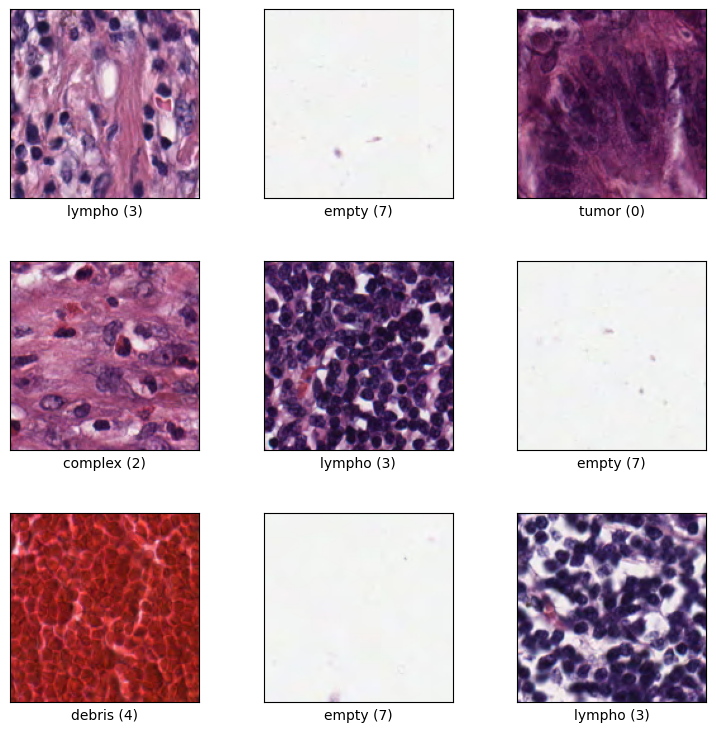

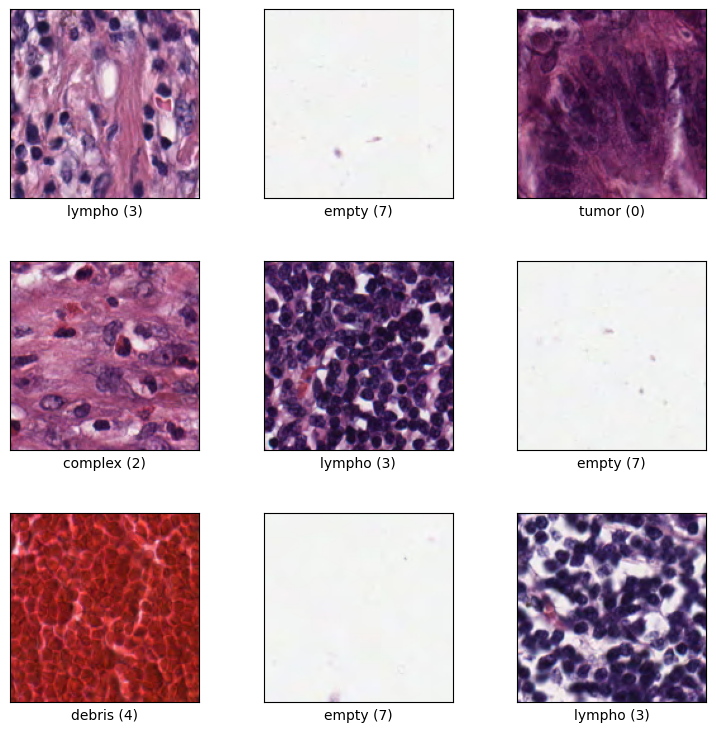

In [12]:
## Se muestran ejemplos
tfds.show_examples(ColTrain,info2)

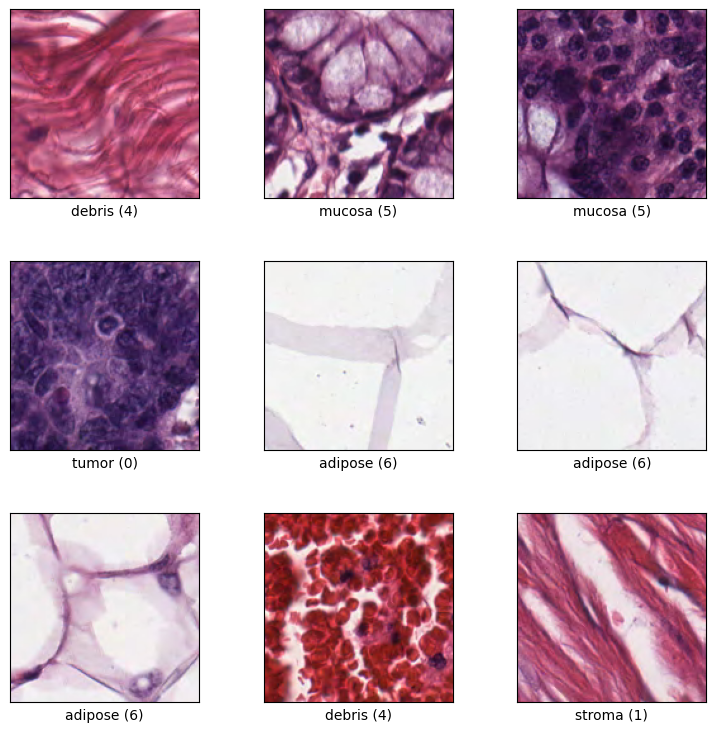

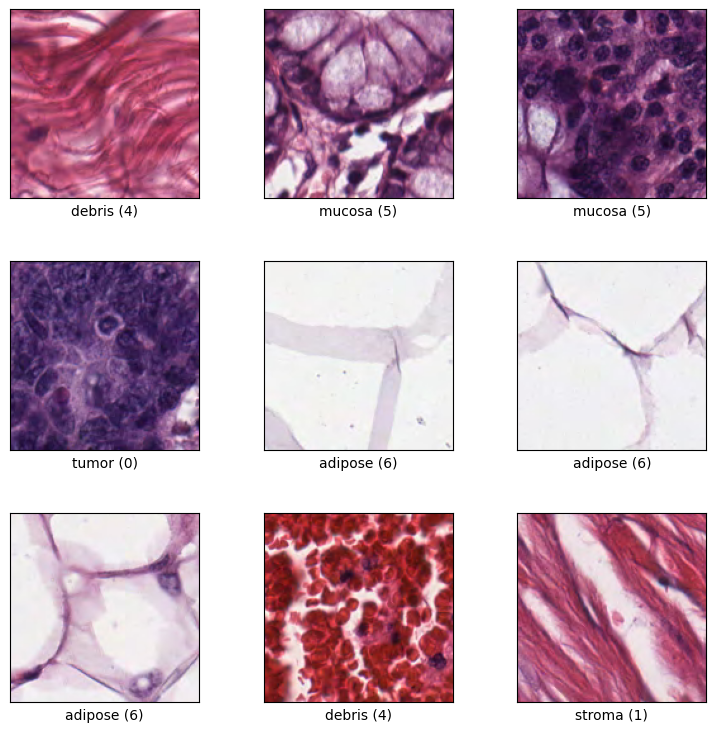

In [13]:
tfds.show_examples(ColTest,info2)

In [14]:
## Obtención de imágenes y etiquetas de entrenamiento

ColImTrain = np.array([img['image'].numpy()[:,:,0] for img in ColTrain])
ColLabTrain = np.array([label['label'] for label in ColTrain])

In [15]:
ColImTest = np.array([img['image'].numpy()[:,:,0] for img in ColTest])
ColLabTest = np.array([label['label'] for label in ColTest])

In [16]:
## Tamaño de imágenes
ColImTrain.shape

(750, 150, 150)

En este caso, todas las imágenes son regulares

In [17]:
## Etiquetas
np.unique(ColLabTrain)

array([0, 1, 2, 3, 4, 5, 6, 7])

Se tienen 8 categorías distintas:
* 0 = tumor
* 1 = stroma
* 2 = complejo
* 3 = linfa
* 4 = desecho
* 5 = mucosa
* 6 = adiposo
* 7 = vacío


## Ejercicio 2

Construya la arquitectura de la red neuronal a utilizar

### Dataset 1

La red para las imágenes de células de malaria cuenta con las siguientes capas:
* Average Pooling con stride de 2
* Convolución con 20 filtros
* MaxPool con 2 strides
* Convolución con 45 filtros
* Etapa de flatten
* Dense de 500
* Dense de 100
* Dense de 2

In [18]:
### Se cambia el tamaño de todas las imágenes para poder analizar
for i in range(ImTrain.shape[0]):

  ImTrain[i] = cv2.resize(ImTrain[i],(200,200))


In [19]:
for i in range(MalTest.shape[0]):

  MalTest[i] = cv2.resize(MalTest[i],(200,200))


In [20]:
GrayTrain = np.zeros((ImTrain.shape[0],200,200))
for img in range (ImTrain.shape[0]):
  GrayTrain[img] = ImTrain[img].astype('float32')/255



In [21]:
GrayTest = np.zeros((MalTest.shape[0],200,200))
for img in range(MalTest.shape[0]):
  GrayTest[img] = MalTest[img].astype('float32')/255

In [22]:
# Modelo para este sistema
ModelMalaria = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (200,200,1)),
    keras.layers.Conv2D(20,3,activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(45, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')

])


In [23]:
ModelMalaria.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [24]:
ModelMalaria.fit(
    x = GrayTrain,
    y = LabTrain,
    batch_size = 40,
    epochs = 4
)

Epoch 1/4
138/138 [==============================] - 14s 23ms/step - loss: 0.9551 - accuracy: 0.5475
Epoch 2/4
138/138 [==============================] - 3s 23ms/step - loss: 0.6271 - accuracy: 0.6546
Epoch 3/4
138/138 [==============================] - 3s 22ms/step - loss: 0.5099 - accuracy: 0.7544
Epoch 4/4
138/138 [==============================] - 3s 21ms/step - loss: 0.3285 - accuracy: 0.8614


Puede verse que con 4 epochs, se obtiene un accuracy de 0.85

### Dataset2

La red para las imágenes de células de malaria cuenta con las siguientes capas:
* Average Pooling con stride de 2
* Convolución con 20 filtros
* MaxPool con 2 strides
* Convolución con 45 filtros
* Etapa de flatten
* Dense de 500
* Dense de 100
* Dense de 8 como salida

In [25]:
## Las imágenes se convierten a escala de grises
ColImTrain = ColImTrain.astype('float32')/255
ColImTest = ColImTest.astype('float32')/255

In [26]:
# Modelo para este sistema
ModelColon = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (150,150,1)),
    keras.layers.Conv2D(20,3,activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(45, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(8, activation = 'softmax')

])

In [27]:
ModelColon.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [28]:
ModelColon.fit(
    x = ColImTrain,
    y = ColLabTrain,
    batch_size = 20,
    epochs = 6
)

Epoch 1/6
38/38 [==============================] - 3s 14ms/step - loss: 1.8443 - accuracy: 0.3200
Epoch 2/6
38/38 [==============================] - 0s 10ms/step - loss: 1.1510 - accuracy: 0.4867
Epoch 3/6
38/38 [==============================] - 0s 10ms/step - loss: 0.9150 - accuracy: 0.6440
Epoch 4/6
38/38 [==============================] - 0s 10ms/step - loss: 0.6703 - accuracy: 0.7293
Epoch 5/6
38/38 [==============================] - 0s 10ms/step - loss: 0.4819 - accuracy: 0.8053
Epoch 6/6
38/38 [==============================] - 0s 10ms/step - loss: 0.3953 - accuracy: 0.8693


Al haber realizado 6 epochs, se obtiene un accuracy de 0.837

## Problema 3

Evaluación de los modelos obtenidos

### Dataset 1

In [29]:
ModelMalaria.evaluate( x = GrayTest, y = MLabTest)

44/44 [==============================] - 1s 8ms/step - loss: 0.9304 - accuracy: 0.5878


[0.9303760528564453, 0.5878084301948547]

Con el modelo actual, se obtuvo un accuracy de 0.58, lo cual no es muy satisfactorio

### Dataset 2

In [30]:
ModelColon.evaluate( x = ColImTest, y = ColLabTest)

79/79 [==============================] - 1s 5ms/step - loss: 1.5557 - accuracy: 0.5068


[1.555722951889038, 0.5067999958992004]

Con el modelo actual, se obtuvo un accuracy de 0.50, lo cual es bastante bajo.

### Problema 4

Mejoras a los modelos planteados

### Dataset 1

Para el dataset 1, se elaboró un segundo modelo con más epochs, y se agregó otra etapa de max pooling y filtros

In [31]:
# Modelo para este sistema mejorado
ModelMalaria2 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (200,200,1)),
    keras.layers.Conv2D(16,3,activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(16, 3, activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(25,activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')

])

In [32]:
ModelMalaria2.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [33]:
ModelMalaria2.fit(
    x = GrayTrain,
    y = LabTrain,
    batch_size = 40,
    epochs = 8
)

Epoch 1/8
138/138 [==============================] - 4s 11ms/step - loss: 0.6931 - accuracy: 0.5484
Epoch 2/8
138/138 [==============================] - 1s 10ms/step - loss: 0.6522 - accuracy: 0.6170
Epoch 3/8
138/138 [==============================] - 2s 11ms/step - loss: 0.6203 - accuracy: 0.6546
Epoch 4/8
138/138 [==============================] - 1s 10ms/step - loss: 0.5892 - accuracy: 0.6880
Epoch 5/8
138/138 [==============================] - 1s 9ms/step - loss: 0.5416 - accuracy: 0.7299
Epoch 6/8
138/138 [==============================] - 1s 9ms/step - loss: 0.4688 - accuracy: 0.7749
Epoch 7/8
138/138 [==============================] - 1s 9ms/step - loss: 0.3737 - accuracy: 0.8302
Epoch 8/8
138/138 [==============================] - 1s 9ms/step - loss: 0.2807 - accuracy: 0.8799


In [34]:
ModelMalaria2.evaluate(
    x = GrayTest, y = MLabTest
)

44/44 [==============================] - 0s 6ms/step - loss: 1.1130 - accuracy: 0.6313


[1.1129552125930786, 0.6313498020172119]

Con el cambio de filtros, el accuracy subió levemente hasta 0.63

### Dataset 2

Se implementa un algoritmo con distinta cantidad de filtros y pooling

In [35]:
# Modelo para este sistema mejorado
ModelColon2 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (150,150,1)),
    keras.layers.Conv2D(30,3,activation = 'relu'),
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(20, 3, activation="relu"),
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(20, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(8, activation = 'softmax')

])

In [36]:
ModelColon2.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [37]:
ModelColon2.fit(
    x = ColImTrain,
    y = ColLabTrain,
    batch_size = 15,
    epochs = 8
)

Epoch 1/8
50/50 [==============================] - 4s 6ms/step - loss: 1.7310 - accuracy: 0.2973
Epoch 2/8
50/50 [==============================] - 0s 6ms/step - loss: 1.2811 - accuracy: 0.4307
Epoch 3/8
50/50 [==============================] - 0s 6ms/step - loss: 1.1594 - accuracy: 0.4493
Epoch 4/8
50/50 [==============================] - 0s 6ms/step - loss: 1.1166 - accuracy: 0.5027
Epoch 5/8
50/50 [==============================] - 0s 8ms/step - loss: 1.0182 - accuracy: 0.5227
Epoch 6/8
50/50 [==============================] - 0s 9ms/step - loss: 0.9633 - accuracy: 0.5827
Epoch 7/8
50/50 [==============================] - 0s 8ms/step - loss: 0.9224 - accuracy: 0.6067
Epoch 8/8
50/50 [==============================] - 0s 8ms/step - loss: 0.8891 - accuracy: 0.6133


In [40]:
ModelColon2.evaluate(
    x= ColImTest,
    y = ColLabTest
)

79/79 [==============================] - 0s 4ms/step - loss: 1.0145 - accuracy: 0.6048


[1.01448392868042, 0.6047999858856201]

Se obtuvo un accuracy de 0.605, lo cual mejora el 0.50 anterior.

## Problema 5

Evaluación y comparación

### Dataset 1

Los modelos utilizados en en análsis de las imágenes de malaria no son los modelos más eficientes. Sin embargo, puede observarse ligeras mejoras en el modelo 2 con respecto al primero. El cambio en la cantidad de filtros y el maxpool antes del flatten hicieron una leve diferencia.

Para poder obtener un mejor modelo, se recomienda utilizar el set completo de entrenamiento, el cual no pudo ser utilizado por limitantes de cómputo. También se recomienda cambiar la métrica del modelo, para ver si hay otro parámetro el cual está mejor optimizado.

### Dataset 2

En el modelo 1 aplicado para este modelo, se obtuvo una precisión del 50%, lo cual es muy bajo. Al implementar la etapa de filtrado y cambiar el número de fitros elevó el accuracy a 60.5%.


Cabe mencionar que el primer modelo parece tener overfitting, ya que tiene un accuracy alta para el set de entrenamiento, pero el peor para el set de pruebas. El modelo 2 tiene un accuracy más bajo para el set de entrenamiento, pero funcionó mejor en las pruebas.

Podría intentarse incrementar las estapas de filtrado, utilizar el set completo y verificar cómo cambian los demás parámetros.
